## Supervised learning Classification _ Learning File

- Student Admission Case Study

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df =pd.read_csv('efBsIi.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [4]:
df.shape

(400, 9)

In [5]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

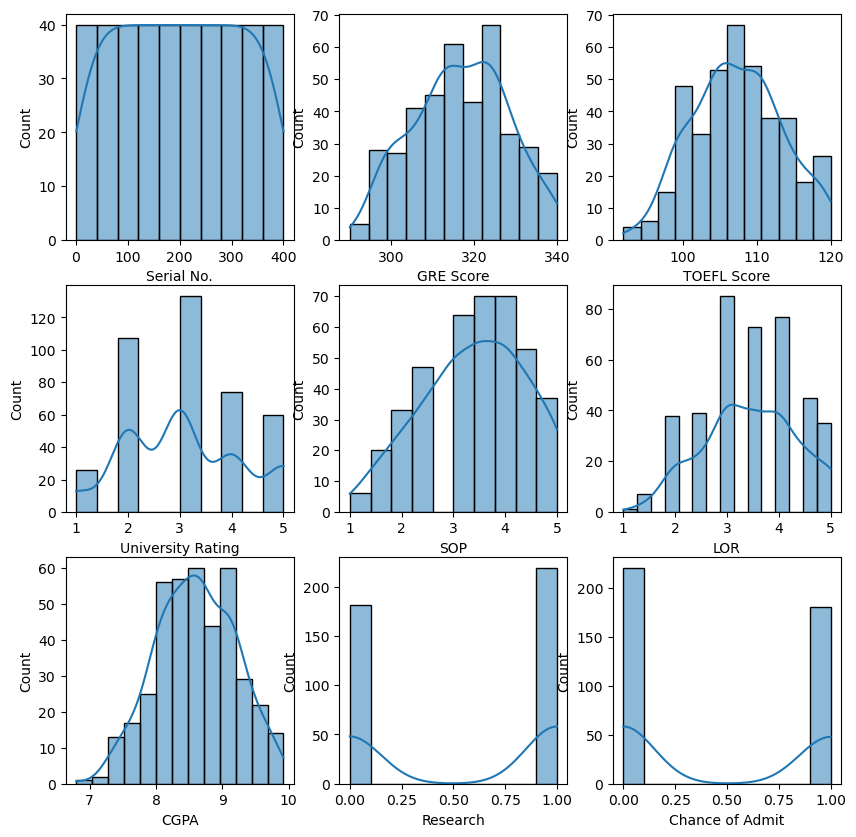

In [16]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
for col, ax in zip(df.columns,ax.flatten()):
    sns.histplot(x=df[col],ax=ax, kde=True)
    ax.set_xlabel(col)
plt.show()

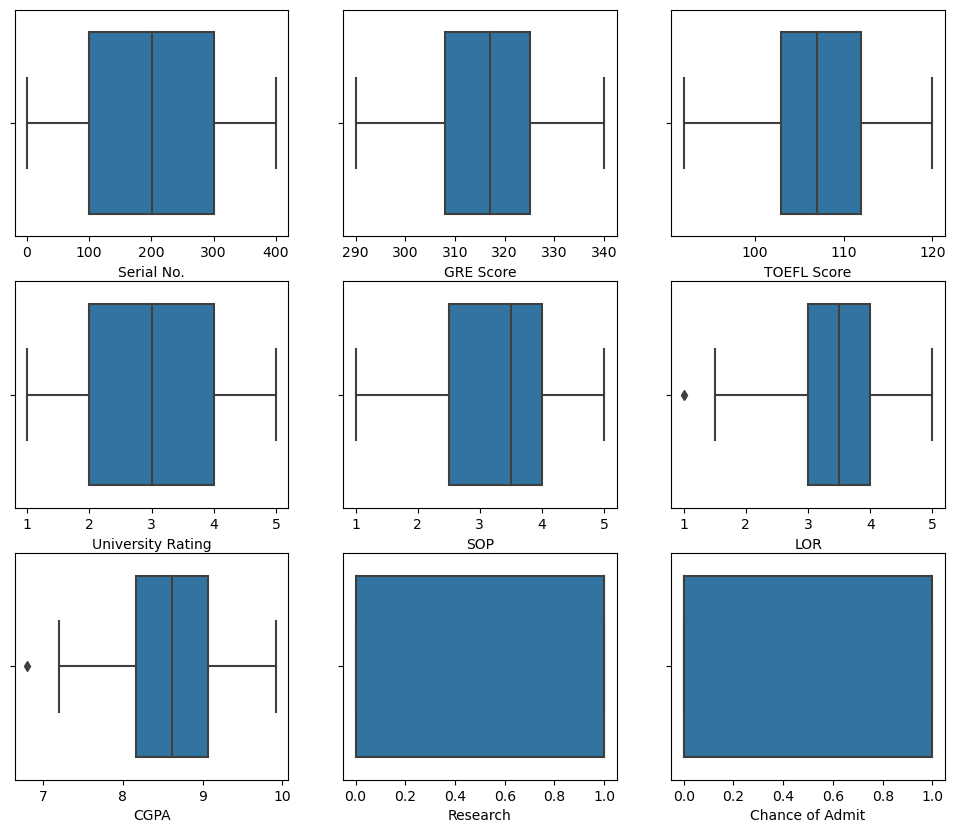

In [6]:
fig, ax = plt.subplots(3,3, figsize = (12,10))
for col, ax in zip (df.columns, ax.flatten()):
    sns.boxplot(x=df[col], ax =ax)
    plt.xlabel(col)
plt.show()

- Very few outliers in LOR, CGPA
- Not Removing due to small sized dataset
## In classification do not do outlier treatment blindly.

In [7]:
df['Research']= df['Research'].astype('object')
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

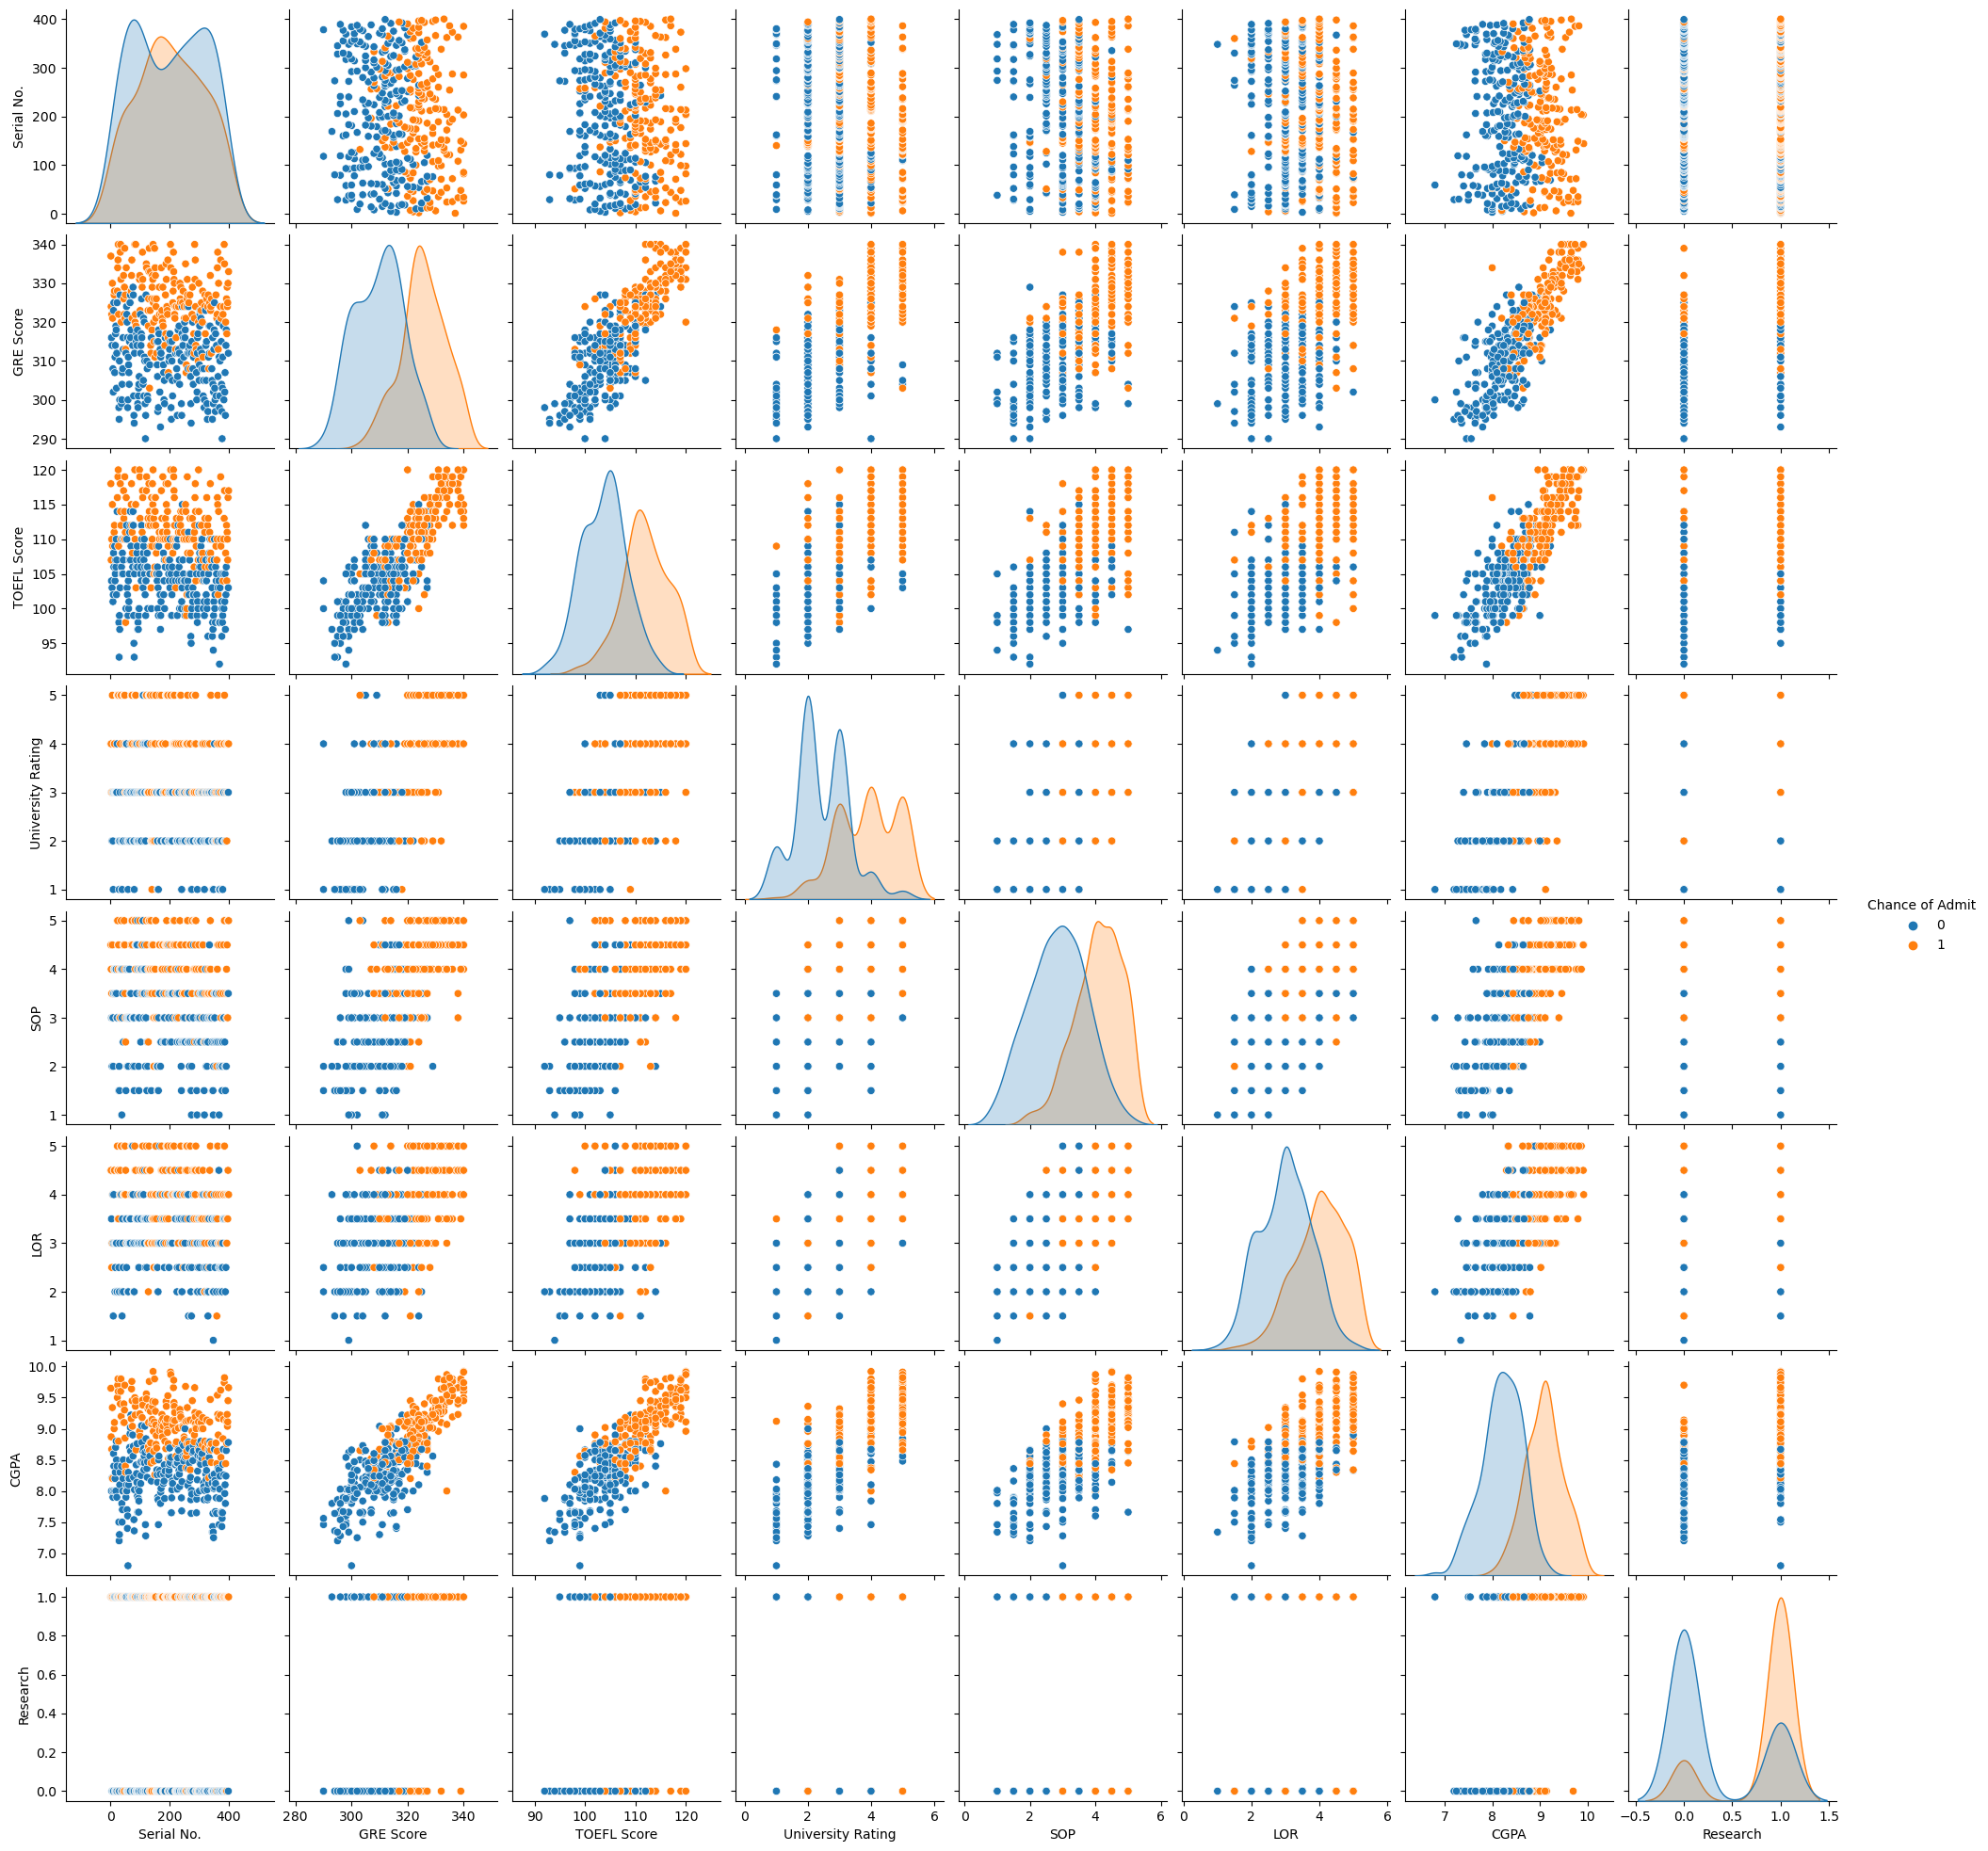

In [8]:
sns.pairplot(df, hue = 'Chance of Admit')

Pairplot gives following inferences:
1. Low GRE and Tofel scores will lead to low chance of admit to university.
2. Low CGPA lowers chance of admit
3. CGPA has positive linear correlation with GRE and TOFEL scores. Wide range of students perform equally good in their academics as well as admit exams
4. LOR has distribution of overlapping classes.
5. Research exp. does not guarantee admission.

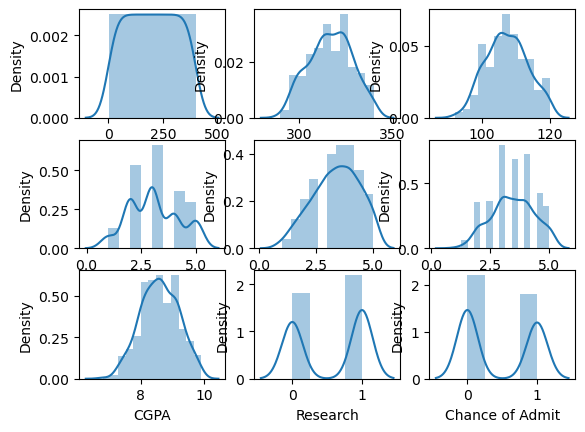

<Figure size 640x480 with 0 Axes>

In [9]:
fig,ax = plt.subplots(3,3)
for col, ax in zip (df.columns, ax.flatten()):
    sns.distplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()
plt.tight_layout()

<Axes: xlabel='Chance of Admit', ylabel='count'>

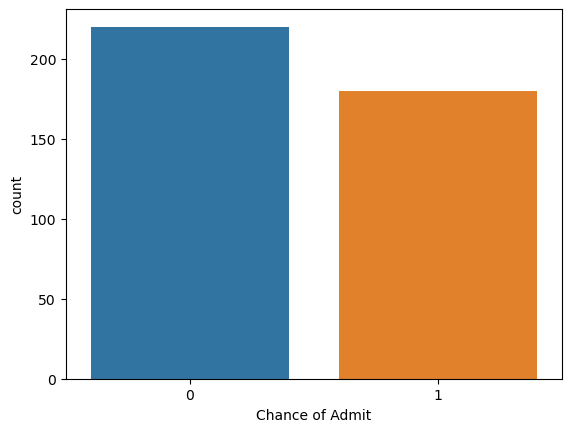

In [10]:
sns.countplot(x=df['Chance of Admit'])

In [8]:
df = df.drop('Serial No.', axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [9]:
a=df['Chance of Admit'].value_counts()
a

0    220
1    180
Name: Chance of Admit, dtype: int64

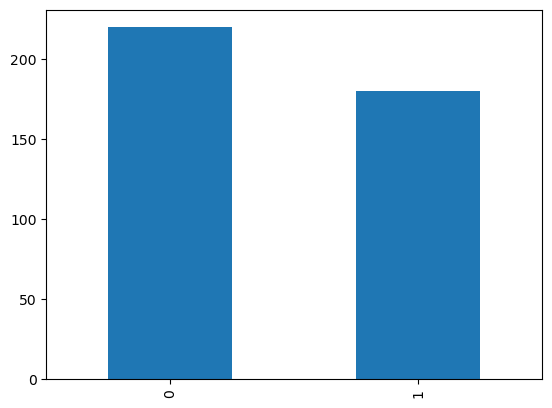

In [10]:
a.plot(kind='bar')
plt.show()

In [11]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.450000
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498117
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels
import statsmodels.api as sm

X= df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']
ss= StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X = sm.add_constant(X)

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =100)
X.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,1.0,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,1.0,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,1.0,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,1.0,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [13]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(280, 8) (120, 8) (280,) (120,)


In [14]:
logreg = sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.258693
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Feb 2024   Pseudo R-squ.:                  0.6244
Time:                        17:00:03   Log-Likelihood:                -72.434
converged:                       True   LL-Null:                       -192.87
Covariance Type:            nonrobust   LLR p-value:                 2.419e-48
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6227      0.224     -2.783      0.005      -1.061      -0.184
GRE Score             0.8098      0.478      1.696      0.090      -0.126       1.746
TOEFL Score           0.8554      0.426      2.010      0.044       0.021       1.690
University Rating     0.4317      0.351      1.231      0.218      -0.256       1.119
SOP                   0.3647      0.416      0.878      0.380      -0.450       1.179
LOR                   0.2927      0.347      0.843      0.399      -0.388       0.973
CGPA                  1.8455      0.507      3.642      0.000       0.852       2.838
Research              0.1733      0.243      0.715      0.475      -0.302       0.649
=====================================================================================
"""

- We have CGPA and TOFEL Score as significant features.
- p value for LLR test is less than 0.05 this concludes model is significant.

In [15]:
logreg.params

const               -0.622716
GRE Score            0.809844
TOEFL Score          0.855415
University Rating    0.431726
SOP                  0.364733
LOR                  0.292676
CGPA                 1.845467
Research             0.173335
dtype: float64

- inferences: odds of chances of getting admission increases by e^0.8 per unit increase of GRE Score.
- log of odds of chances of admit increases by 0.8 per unit change of GRE Score.
- coeff TOFEL - 0.855 odds of chance of admit will increase by e^0.855 times per unit increase in TOFEL score or log of odds chances admit
- coef of CGPA 1.84 odds of chance of admit will increase by e^1.8454 times per unit increase in CGPA or log of odds chances of admit 

In [16]:
parameter_odds= np.exp(logreg.params)
parameter_odds

const                0.536486
GRE Score            2.247558
TOEFL Score          2.352351
University Rating    1.539913
SOP                  1.440130
LOR                  1.340009
CGPA                 6.331057
Research             1.189265
dtype: float64

- odds of admission will increase by 2.34 times per unit change in TOFEL score.
- odds of admission will increase by 6.33 times per unit change in CGPA.

In [17]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

248    0.806962
318    0.584090
173    0.973940
285    0.992736
184    0.076380
dtype: float64

In [18]:
# Convert into categorical data
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]
y_pred[0:5]

[1, 1, 1, 1, 0]

In [19]:
# Manually trying different threshold
for threshold in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    y_pred = [1 if i> threshold else 0 for i in y_pred_prob]
    print(y_pred[0:7])

[1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1, 0]


In [20]:
from sklearn.metrics import roc_curve,roc_auc_score

In [22]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob)
y_t = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Threshold':thresh})
y_t['diff']= y_t.TPR - y_t.FPR
y_t = y_t.sort_values(by='diff',ascending=False)
y_t.head()

,TPR,FPR,Threshold,diff
12,0.849057,0.089552,0.447262,0.759504
10,0.830189,0.074627,0.455962,0.755562
14,0.886792,0.134328,0.235019,0.752464
18,0.924528,0.179104,0.180777,0.745424
16,0.905660,0.164179,0.184593,0.741481


In [26]:
y_pred_best = [1 if i>0.447262 else 0 for i in y_pred_prob]
y_pred_best[:10]

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0]

## Logistic Regression using sklearn Lib

In [27]:
X_train = X_train.drop('const',axis=1)

In [28]:
X_test = X_test.drop('const',axis=1)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred_lr = lr.predict(X_test)
y_pred_lr[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [36]:
lr.coef_

array([[0.791731  , 0.83261777, 0.42268596, 0.35951355, 0.31151405,
        1.55700015, 0.1860684 ]])

In [39]:
pd.DataFrame({'Feature':X_train.columns,'coef':lr.coef_[0]})

,Feature,coef
0,GRE Score,0.791731
1,TOEFL Score,0.832618
2,University Rating,0.422686
3,SOP,0.359514
4,LOR,0.311514
5,CGPA,1.557000
6,Research,0.186068


### classification Model Evaluation Metrics

In [1]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred_lr)
mat

NameError: name 'y_test' is not defined

Text(50.722222222222214, 0.5, 'Predicted')

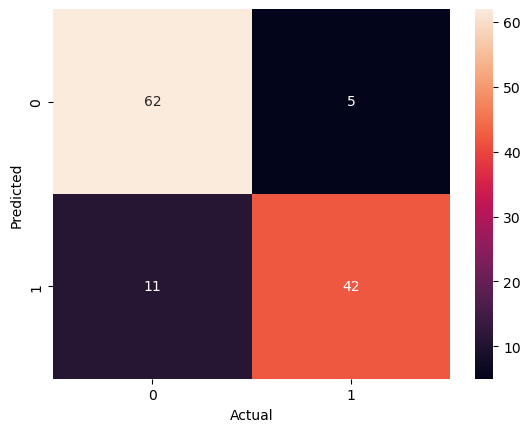

In [29]:
sns.heatmap(mat,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [30]:
TN = mat[0][0]
FP = mat[1][0]
FN = mat[0][1]
TP = mat[1][1]
print(TN,TP,FN,FP)

62 42 5 11


In [31]:
accuracy = (TP+TN)/ (TP+TN+FP+FN)
accuracy

0.8666666666666667

In [32]:
precision = TP / (TP+FP)
precision

0.7924528301886793

In [33]:
Recall = TP / (TP+FN)
Recall

0.8936170212765957

In [34]:
false_positive_rate = FP/ (FP+TN)
false_positive_rate

0.1506849315068493

In [35]:
specificity = TN/(TN+FP)
specificity

0.8493150684931506

In [36]:
F1_score = 2* ((precision*Recall)/(precision+Recall))
F1_score

0.8400000000000001

In [37]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred_lr)
print(acc_table)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.89      0.79      0.84        53

    accuracy                           0.87       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [38]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_lr)
kappa

0.7264177828441152

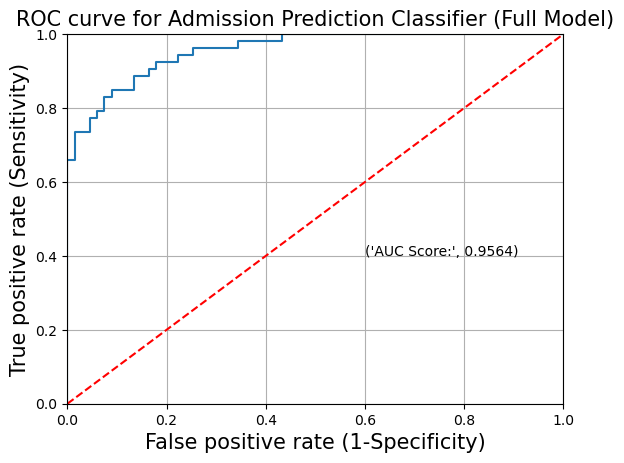

In [39]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the functlon
from sklearn.metrics import roc_curve # ROC
from sklearn.metrics import accuracy_score
from sklearn import metrics # AUC
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# add plot and axes labels
# set text size using 'fontsize
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

#add the AUC score to the plot
# 'x' and 'y' gives position of the text
#'s' is the text
# use round() to round-off the AUC score upto 4 digits
auc = round(metrics.roc_auc_score(y_test, y_pred_prob),4)
plt.text(x=0.6, y= 0.4, s = ('AUC Score:', auc))

# plot the grid
plt.grid(True)

In [40]:
from sklearn.metrics import log_loss
cross_entrophy = log_loss(y_test, y_pred_lr)
cross_entrophy

4.805820451882287

## Yodens table

In [41]:
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob[:5]

array([[0.20800586, 0.79199414],
       [0.4404007 , 0.5595993 ],
       [0.03411   , 0.96589   ],
       [0.01011942, 0.98988058],
       [0.90923889, 0.09076111]])

In [42]:
y_pred_prob = y_pred_prob[:,1]

In [43]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)
youdens_table = pd.DataFrame({'TPR':tpr, 'FPR':fpr, 'Threshold':threshold})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference',ascending = False).reset_index(drop=True)

print(youdens_table.head())
print('')
print('Best Threshold is:',0.438938)

        TPR       FPR  Threshold  Difference
0  0.849057  0.089552   0.438938    0.759504
1  0.886792  0.149254   0.247387    0.737539
2  0.867925  0.134328   0.281311    0.733596
3  0.792453  0.059701   0.538729    0.732751
4  0.773585  0.044776   0.559599    0.728809

Best Threshold is: 0.438938


In [44]:
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[62,  5],
       [11, 42]], dtype=int64)

In [45]:
# Cost of FN = 3
# cost of FP = 1.3

In [46]:
FP = cm[0][1]
FN = cm[1][0]
cost = 3*FN + 1.3*FP
cost

39.5

## Naive Bayes Algorithm

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb_model = gnb.fit(X_train,y_train)

<Axes: >

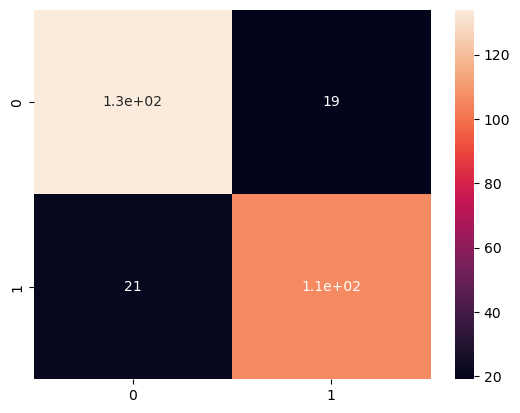

In [48]:
train_pred = gnb.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True)

<Axes: >

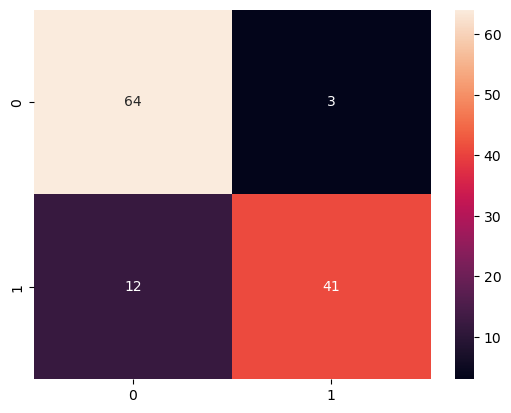

In [49]:
y_pred_test = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot=True)

In [50]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       153
           1       0.85      0.83      0.84       127

    accuracy                           0.86       280
   macro avg       0.86      0.86      0.86       280
weighted avg       0.86      0.86      0.86       280



In [51]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        67
           1       0.93      0.77      0.85        53

    accuracy                           0.88       120
   macro avg       0.89      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120



In [52]:
cohen_kappa_score(y_test,y_pred_test)

0.7419724770642202

In [53]:
cohen_kappa_score(y_train,train_pred)

0.7114145838701366

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
def roc_plot(model,X,y,label):
    y_pred = model.predict_proba(X)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y,y_pred)
    
    auc_score = roc_auc_score(y,y_pred)
    
    plt.plot(fpr,tpr, label = label+'(AUC Score = %0.4f)'%auc_score)
    
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    plt.plot([0,1],[0,1],'r--')
    
    plt.title('ROC Curve', fontsize=15)
    plt.xlabel('False positive rate (1-specificity)', fontsize=15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=15)
    
    plt.legend(loc = 'lower right')
    
    plt.grid(True)


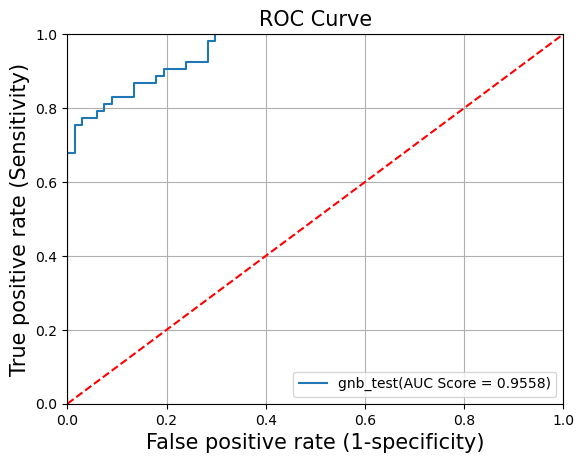

In [56]:
roc_plot(gnb_model,X_test,y_test,'gnb_test')

## KNN (KNeighbours Classifier)

In [57]:
# We do train test split although not required just to check performance giving it to client.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors=3)

knn_model = knn_classification.fit(X_train,y_train)

In [59]:
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report
test_report = classification_report(y_test,y_pred_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.91      0.81      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



In [61]:
train_report = classification_report(y_train,y_pred_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       153
           1       0.89      0.89      0.89       127

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



In [62]:
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

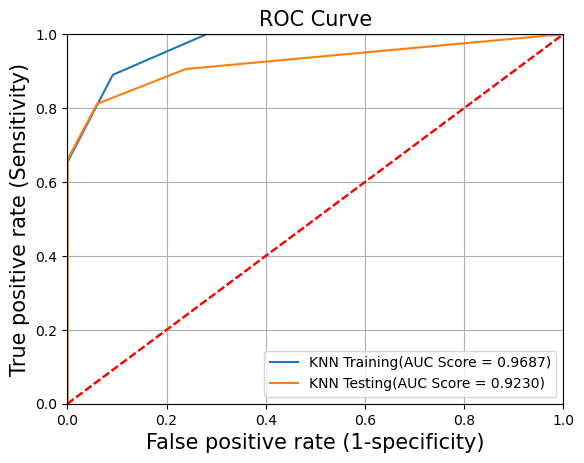

In [63]:
roc_plot(knn_model,X_train,y_train,'KNN Training')
roc_plot(knn_model,X_test,y_test,'KNN Testing')

In [64]:
from sklearn.model_selection import GridSearchCV
tuning_param = ({'n_neighbors':range(31,50,2),
               'p':[1,2,3,4,5]})

knn_model = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator=knn_model, param_grid=tuning_param, cv=3, scoring='roc_auc')
knn_grid.fit(X_train,y_train)

print('Best parameters for classifier:', knn_grid.best_params_,'\n')
print('Best observed roc_auc score:',knn_grid.best_score_)

Best parameters for classifier: {'n_neighbors': 35, 'p': 1} 

Best observed roc_auc score: 0.9550716927597911


Performance
Confusion Matrix:
roc_auc score: 0.9533934103069558
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.91      0.81      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120




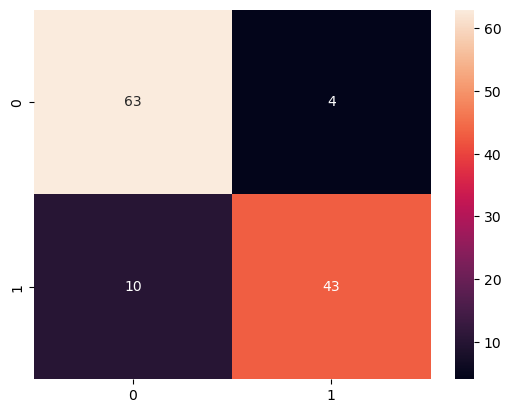

In [65]:
knn_model_2 = KNeighborsClassifier(n_neighbors= 35,p=1)
knn_model = knn_model_2.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print('Performance')

sm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
sns.heatmap(sm,annot=True)

print('roc_auc score:', roc_auc_score(y_test,knn_model.predict_proba(X_test)[:,1]))

print('Classification Report:')
print(classification_report(y_test,y_pred))

print()

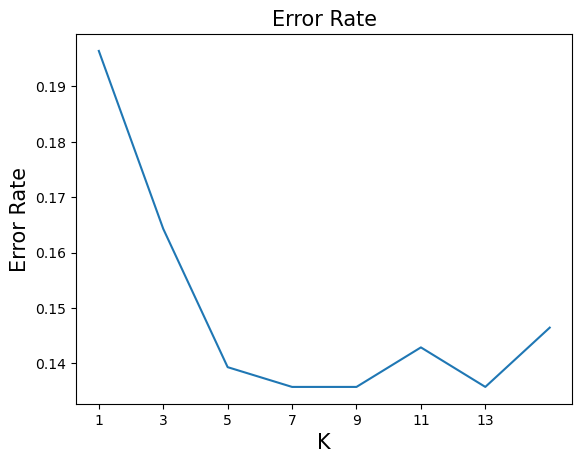

In [66]:
from sklearn.model_selection import cross_val_score
error_rate = []

# use for loop to build a knn model for each K
for i in range(1,16,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, p=2)
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,16,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 15, step = 2))

# plot a vertical line across the minimum error rate
#plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

Performance
Confusion Matrix:
roc_auc score: 0.9533934103069558
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.91      0.81      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120




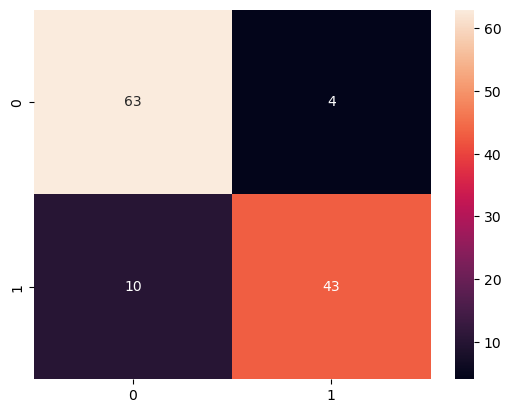

In [67]:
knn_model_3 = KNeighborsClassifier(n_neighbors=7,metric='')
knn_model = knn_model_2.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print('Performance')
                                                                            #### Correct it from video
sm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
sns.heatmap(sm,annot=True)

print('roc_auc score:', roc_auc_score(y_test,knn_model.predict_proba(X_test)[:,1]))

print('Classification Report:')
print(classification_report(y_test,y_pred))

print()

## Decision Tree Algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(random_state=10)
decision_tree = decision_tree_classification.fit(X_train,y_train)

In [69]:
y_pred_dt = decision_tree.predict(X_test)
mat_dt = confusion_matrix(y_test, y_pred_dt)
mat_dt

array([[54, 13],
       [10, 43]], dtype=int64)

In [70]:
train_pred_dt = decision_tree.predict(X_train)
print(classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       127

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



- This is overfit model.

In [71]:
test_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        67
           1       0.77      0.81      0.79        53

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [72]:
#dt_model = DecisionTreeClassifier(criterion='entropy',
                                 # max_depth=)

In [73]:
tunned_params = [{'criterion':['entropy','gini'],
                 'max_depth': range(2,10),
                 'min_samples_split': range(2,10),
                 'min_samples_leaf': range(1,10),
                 'max_leaf_nodes':range(2,10)}]

decision_tree_model = DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=decision_tree_model, param_grid=tunned_params, cv=5)

tree_grid_model = tree_grid.fit(X_train,y_train)

print('Best parameters for Decision Tree Classifier:',
     tree_grid_model.best_params_,'\n')

Best parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 3, 'min_samples_split': 7} 



In [74]:
dt_model = DecisionTreeClassifier(**tree_grid_model.best_params_)
dt_model.fit(X_train,y_train)

train_pred = dt_model.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       153
           1       0.90      0.87      0.88       127

    accuracy                           0.90       280
   macro avg       0.90      0.89      0.90       280
weighted avg       0.90      0.90      0.90       280



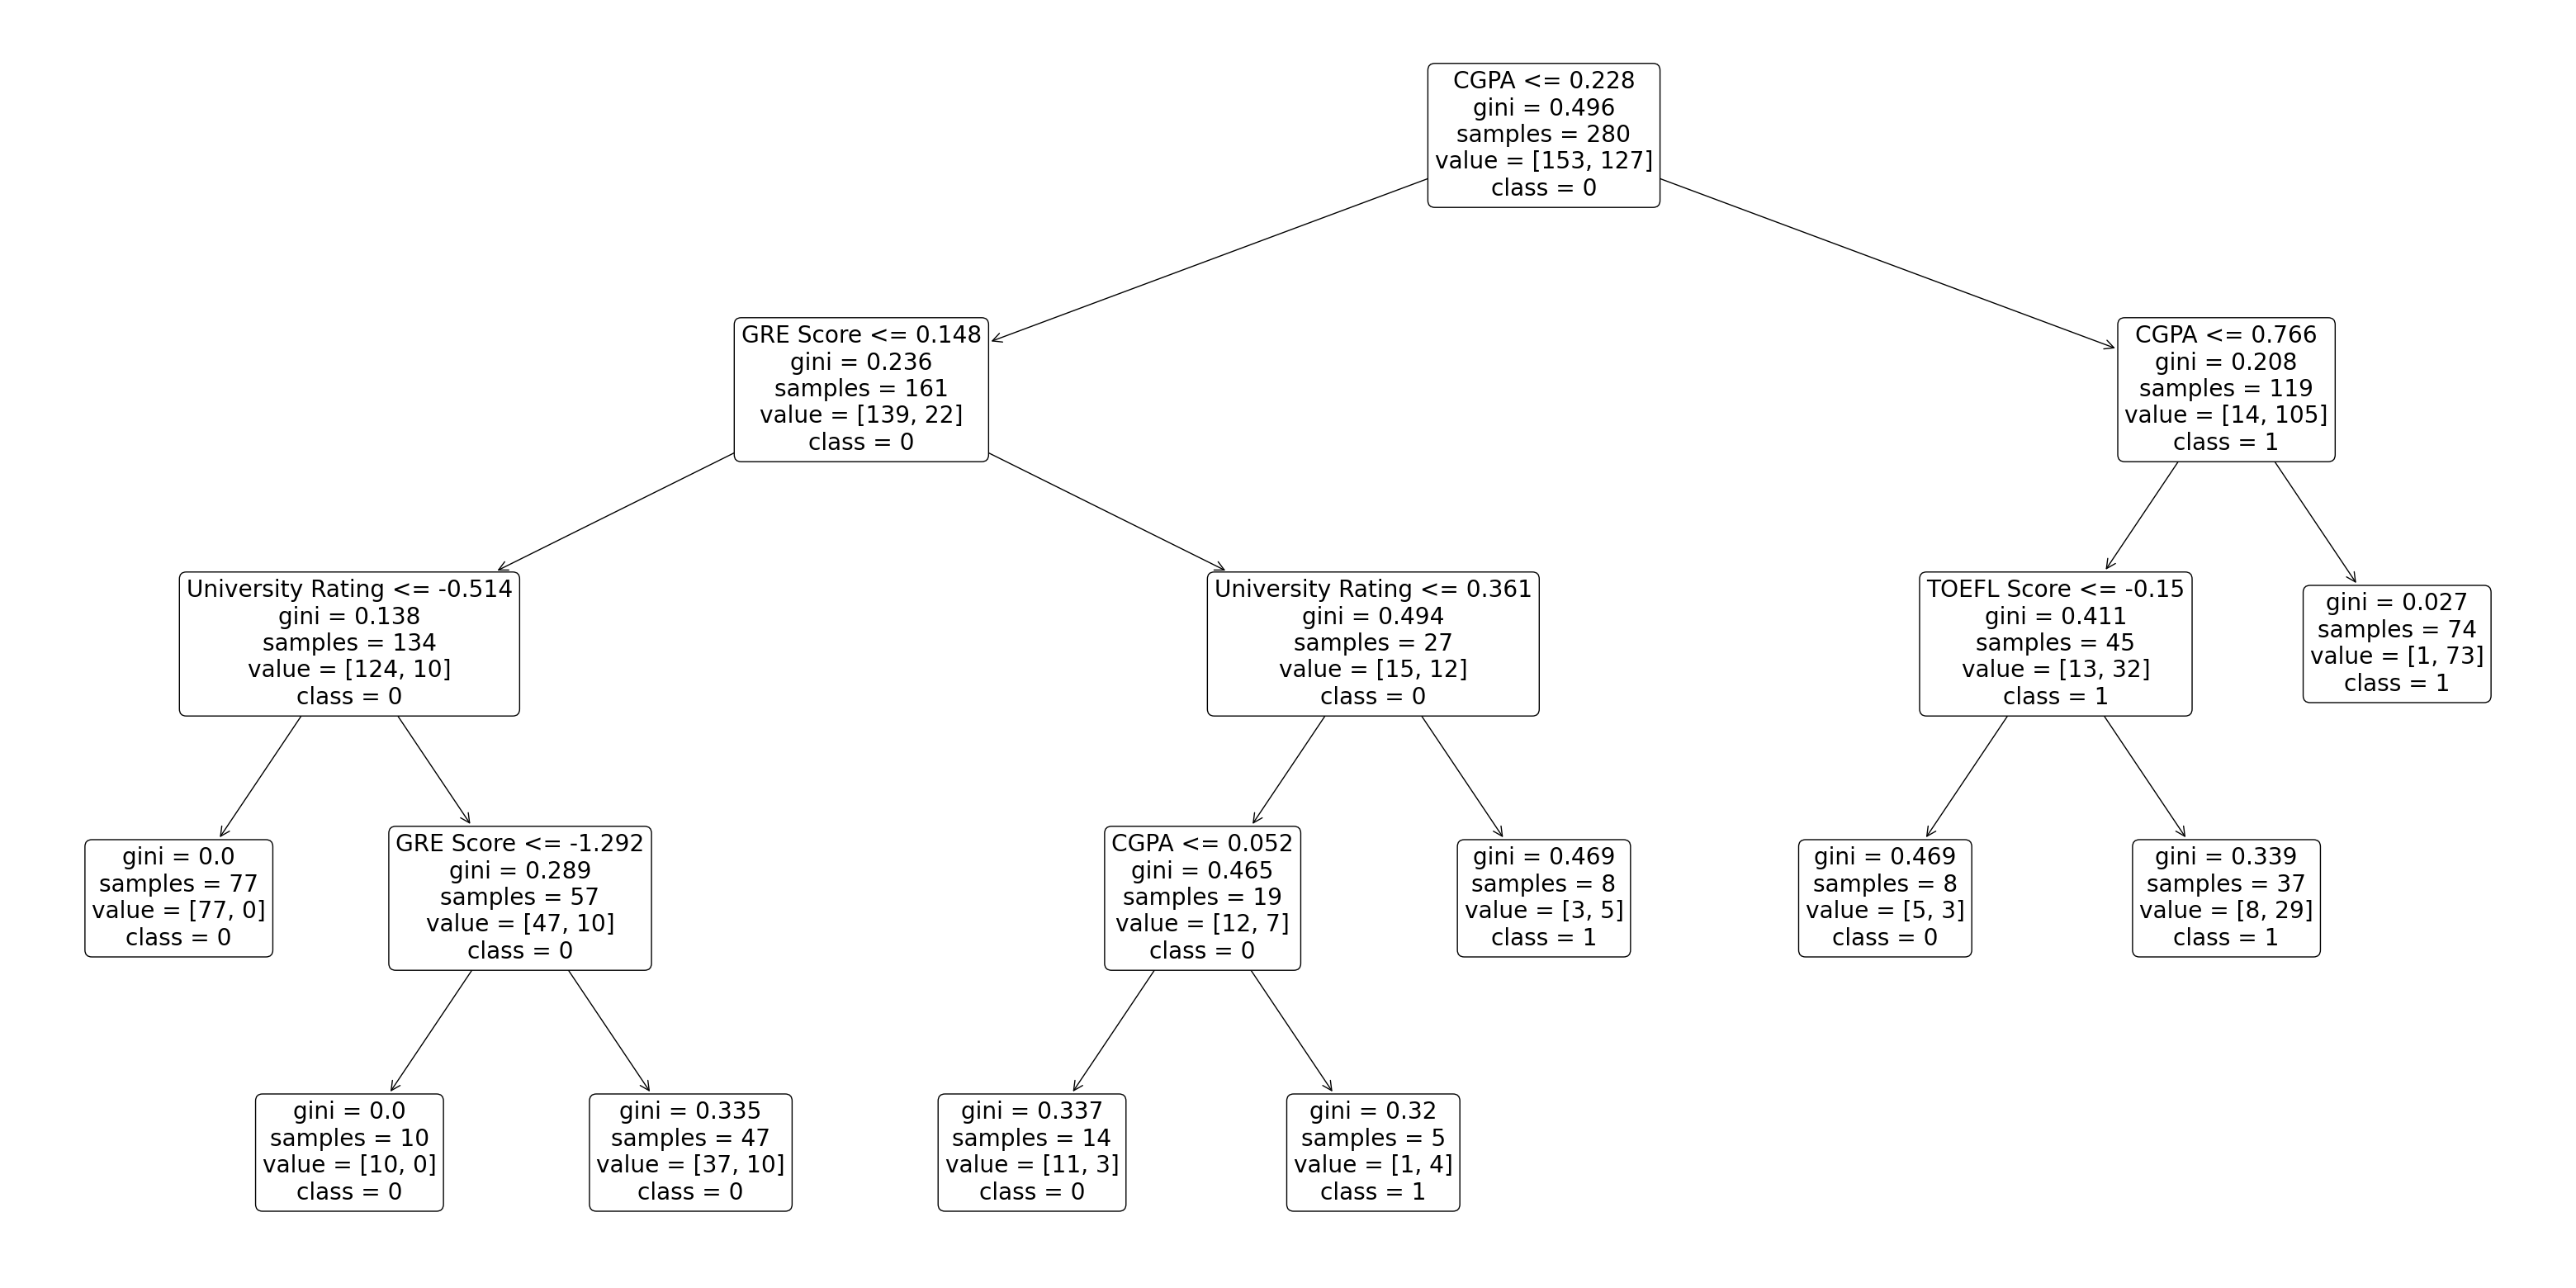

In [75]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(dt_model,feature_names=X_train.columns, rounded=True,class_names=['0','1'])
plt.show()

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_classification = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model = rf_classification.fit(X_train,y_train)

In [77]:
train_pred= rf_model.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       153
           1       1.00      0.96      0.98       127

    accuracy                           0.98       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280



In [78]:
test_pred= rf_model.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        67
           1       0.88      0.79      0.83        53

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



In [79]:
param = ({'criterion':['entropy','gini'],'n_estimators':[10,15,30,40],'max_depth':[12,15,13,14],'min_samples_split':[10,11,12,13,14]})
rfc = RandomForestClassifier(random_state=10)

In [80]:
%%time
rfc_grid = GridSearchCV(rfc,param_grid=param,cv=5)
rfc_grid_model = rfc_grid.fit(X_train,y_train)
rfc_grid_model.best_params_

CPU times: total: 27.2 s
Wall time: 29.8 s


{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 13,
 'n_estimators': 15}

In [81]:
rf_model_best = RandomForestClassifier(**rfc_grid_model.best_params_)
rf_model_best.fit(X_train,y_train)

train_pred = rf_model_best.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       153
           1       0.90      0.92      0.91       127

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [82]:
test_pred = rf_model_best.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        67
           1       0.90      0.81      0.85        53

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120



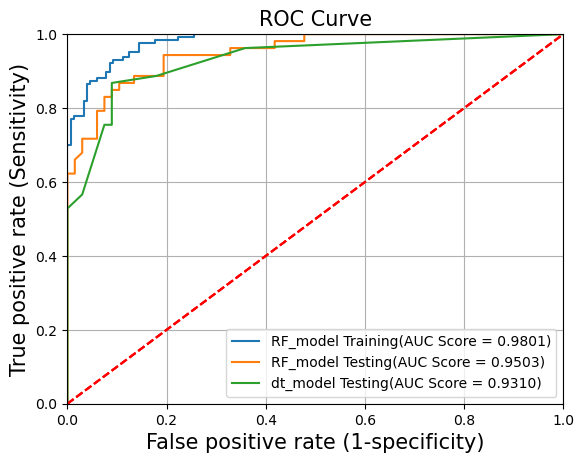

In [83]:
roc_plot(rf_model_best,X_train,y_train,'RF_model Training')
roc_plot(rf_model_best,X_test,y_test,'RF_model Testing')
roc_plot(dt_model,X_test,y_test,'dt_model Testing')

In [84]:
# Important features  - For DT, RF

In [85]:
imp_features = pd.DataFrame({'Features':X_train.columns,
                            'Importance':rf_model_best.feature_importances_})
imp_features

,Features,Importance
0,GRE Score,0.187516
1,TOEFL Score,0.235039
2,University Rating,0.037289
3,SOP,0.055368
4,LOR,0.036916
5,CGPA,0.427021
6,Research,0.020852


<Axes: xlabel='Importance', ylabel='Features'>

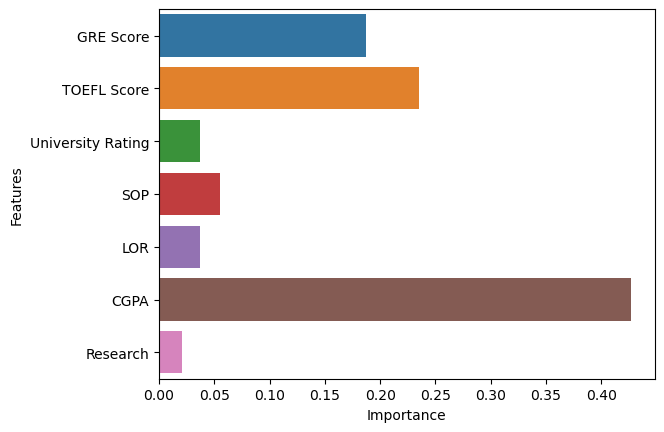

In [86]:
sns.barplot(x='Importance',y='Features',data=imp_features)

## ADA BOOST

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=20,random_state=10)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20, random_state=10)

<Axes: >

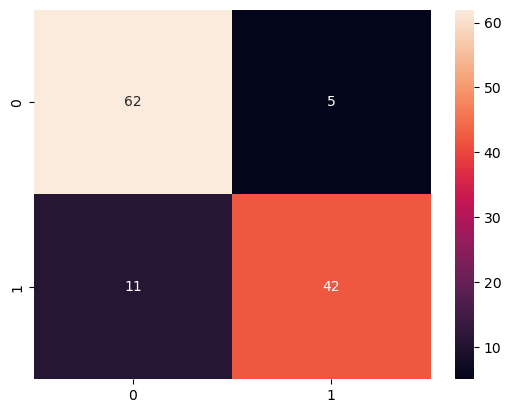

In [88]:
y_pred = ada_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.89      0.79      0.84        53

    accuracy                           0.87       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [90]:
y_pred_train = ada_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       153
           1       0.90      0.87      0.88       127

    accuracy                           0.90       280
   macro avg       0.90      0.89      0.90       280
weighted avg       0.90      0.90      0.90       280



In [91]:
def performance (model,x,y):
    y_pred=model.predict(x)
    print('Confusion Matrix')
    cm = confusion_matrix(y,y_pred)
    print(cm)
    print('Classification Report')
    print(classification_report(y,y_pred))

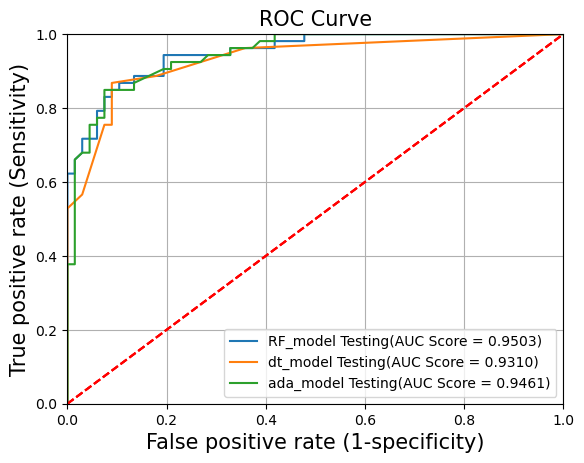

In [92]:
roc_plot(rf_model_best,X_test,y_test,'RF_model Testing')
roc_plot(dt_model,X_test,y_test,'dt_model Testing')
roc_plot(ada_model,X_test,y_test,'ada_model Testing')

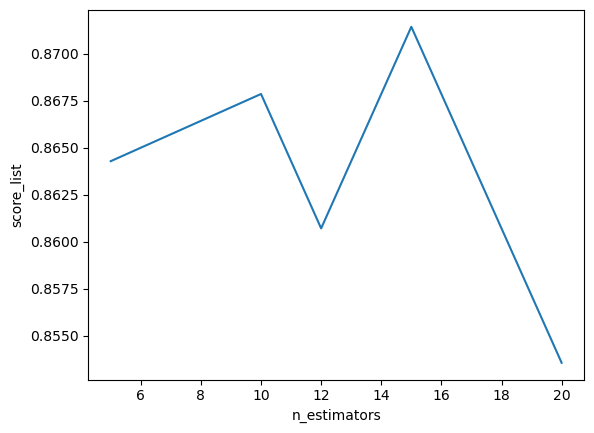

In [93]:
## Tunning params
n_estimators_list = [5,10,12,15,20]
score_list = []

for i in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=i,random_state=10)
    scores = cross_val_score(model,X_train,y_train,cv=5)
    score_list.append(scores.mean())
    
plt.plot(n_estimators_list,score_list)
plt.xlabel('n_estimators')
plt.ylabel('score_list')
plt.show()
    

In [94]:
ada_model2 = AdaBoostClassifier(n_estimators=15,random_state=10)
ada_model2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=15, random_state=10)

In [95]:
performance(ada_model2,X_train,y_train)

Confusion Matrix
[[141  12]
 [ 19 108]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       153
           1       0.90      0.85      0.87       127

    accuracy                           0.89       280
   macro avg       0.89      0.89      0.89       280
weighted avg       0.89      0.89      0.89       280



In [96]:
performance(ada_model2,X_test,y_test)

Confusion Matrix
[[61  6]
 [11 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        67
           1       0.88      0.79      0.83        53

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.86      0.86       120



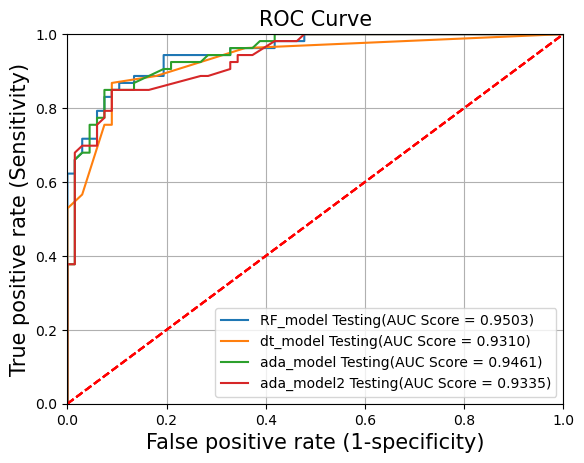

In [97]:
roc_plot(rf_model_best,X_test,y_test,'RF_model Testing')
roc_plot(dt_model,X_test,y_test,'dt_model Testing')
roc_plot(ada_model,X_test,y_test,'ada_model Testing')
roc_plot(ada_model2,X_test,y_test,'ada_model2 Testing')

## Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model = GradientBoostingClassifier(n_estimators=30, max_depth= 10, learning_rate=0.01,random_state=10)
gboost_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=30,
                           random_state=10)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import GridSearchCV
performance(gboost_model,X_train,y_train)

Confusion Matrix
[[153   0]
 [  0 127]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       127

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [100]:
performance(gboost_model,X_test,y_test)

Confusion Matrix
[[58  9]
 [11 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        67
           1       0.82      0.79      0.81        53

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



- Model is overfit. We need to tune the hyperparameters for better performance.

In [101]:
%%time
params = ({'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5],'n_estimators':[30,50,100,150],'max_depth':range(1,15)})

gb_model = GradientBoostingClassifier(random_state=10)
gb_grid=GridSearchCV(gb_model,param_grid =params, cv=3,scoring = 'roc_auc')
gb_grid.fit(X_train,y_train)
print('Best Params are:',gb_grid.best_params_)

Best Params are: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 30}
CPU times: total: 1min 43s
Wall time: 2min


In [102]:
gclassifier = GradientBoostingClassifier(**gb_grid.best_params_,random_state=10)
model = gclassifier.fit(X_train,y_train)

In [103]:
performance(model,X_test,y_test)

Confusion Matrix
[[61  6]
 [10 43]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        67
           1       0.88      0.81      0.84        53

    accuracy                           0.87       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



In [104]:
performance(model,X_train,y_train)

Confusion Matrix
[[140  13]
 [ 18 109]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       153
           1       0.89      0.86      0.88       127

    accuracy                           0.89       280
   macro avg       0.89      0.89      0.89       280
weighted avg       0.89      0.89      0.89       280



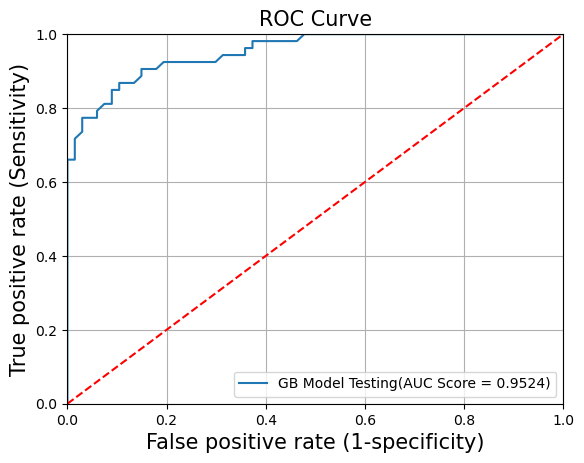

In [105]:
roc_plot(model,X_test,y_test,'GB Model Testing')

## XG Boost

In [108]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [109]:
import xgboost

In [110]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=10, gamma=1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
performance(xgb_model,X_train,y_train)

Confusion Matrix
[[144   9]
 [  9 118]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       153
           1       0.93      0.93      0.93       127

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



In [112]:
performance(xgb_model,X_test,y_test)

Confusion Matrix
[[63  4]
 [10 43]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.91      0.81      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



- The variance is high for XGboost model. This can be controlled by adjusting hyperparameter.

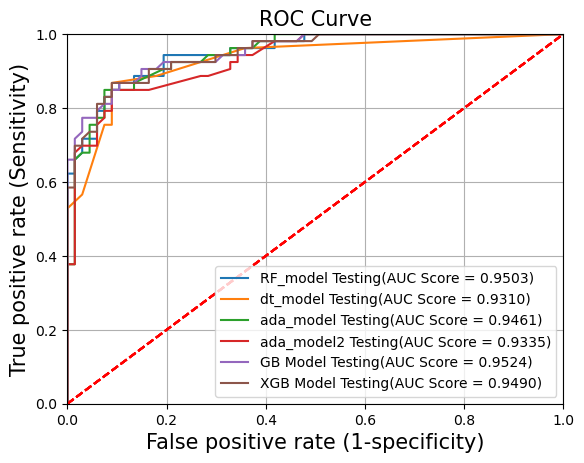

In [114]:
roc_plot(rf_model_best,X_test,y_test,'RF_model Testing')
roc_plot(dt_model,X_test,y_test,'dt_model Testing')
roc_plot(ada_model,X_test,y_test,'ada_model Testing')
roc_plot(ada_model2,X_test,y_test,'ada_model2 Testing')
roc_plot(model,X_test,y_test,'GB Model Testing')
roc_plot(xgb_model,X_test,y_test,'XGB Model Testing')

In [116]:
params = ({'n_estimators':[50,100,150],'max_depth' :range(3,10),
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6],'gamma' :[0,1,2,4,5],'reg_lambda':[1,2,3]})
xg = XGBClassifier()
xgb_grid = GridSearchCV(xg,param_grid = params, cv=3,scoring = 'roc_auc')
xgb_grid.fit(X_train,y_train)
xgb_grid.best_params_

{'gamma': 1,
 'learning_rate': 0.6,
 'max_depth': 3,
 'n_estimators': 50,
 'reg_lambda': 2}

In [117]:
xg_tunned = XGBClassifier(**xgb_grid.best_params_)
xg_tunned.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
performance(xg_tunned,X_train,y_train)

Confusion Matrix
[[142  11]
 [ 12 115]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       153
           1       0.91      0.91      0.91       127

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [119]:
performance(xg_tunned,X_test,y_test)

Confusion Matrix
[[62  5]
 [ 9 44]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        67
           1       0.90      0.83      0.86        53

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



- Performance is improved.